# AWS (S3, Lambda, CloudWatch, DynamoDB)

##### Author: Alex Sherman | alsherman@deloitte.com

In [107]:
import os
from IPython.core.display import display, HTML
from IPython.display import Image
from configparser import ConfigParser, ExtendedInterpolation
import boto3

In [108]:
config = ConfigParser(interpolation=ExtendedInterpolation())
config.read('lambda_exercise/config.ini')
BUCKET_NAME = config['LAMBDA']['BUCKET_NAME']
BASE_URL = config['LAMBDA']['BASE_URL']
COMPANY = config['LAMBDA']['COMPANY']

### Boto3

Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python, which allows Python developers to write software that makes use of services like Amazon S3 and Amazon EC2. 

##### Installation:
    conda install -c anaconda boto3 

##### Next, set up credentials and a region (in e.g. ~/.aws/credentials)

    [default]
    aws_access_key_id = YOUR_KEY
    aws_secret_access_key = YOUR_SECRET
    region=us-east-1

##### Then, from a Python interpreter:

    >>> import boto3
    >>> s3 = boto3.resource('s3')
    >>> for bucket in s3.buckets.all():
            print(bucket.name)

In [109]:
aws_boto3_url = 'http://boto3.readthedocs.io/en/latest/guide/configuration.html'
iframe = '<iframe src={} width=1100 height=300></iframe>'.format(aws_boto3_url)
HTML(iframe)

### AWS S3

Amazon S3 is object storage built to store and retrieve any amount of data from anywhere – web sites and mobile apps, corporate applications, and data from IoT sensors or devices. It is designed to deliver 99.999999999% durability, and stores data for millions of applications used by market leaders in every industry. S3 provides comprehensive security and compliance capabilities that meet even the most stringent regulatory requirements. It gives customers flexibility in the way they manage data for cost optimization, access control, and compliance. S3 provides query-in-place functionality, allowing you to run powerful analytics directly on your data at rest in S3. And Amazon S3 is the most supported cloud storage service available, with integration from the largest community of third-party solutions, systems integrator partners, and other AWS services.

In [110]:
aws_s3_url = 'http://boto3.readthedocs.io/en/latest/guide/migrations3.html'
iframe = '<iframe src={} width=1100 height=300></iframe>'.format(aws_s3_url)
HTML(iframe)

In [111]:
import boto3
s3 = boto3.resource('s3')

In [89]:
s3.create_bucket(
    Bucket='guild-annual-report-test-2', 
    ACL='public-read-write'
)

s3.Bucket(name='guild-annual-report-test-2')

In [112]:
# observe to available functionality for s3 via boto3
print(dir(s3))

['Bucket', 'BucketAcl', 'BucketCors', 'BucketLifecycle', 'BucketLifecycleConfiguration', 'BucketLogging', 'BucketNotification', 'BucketPolicy', 'BucketRequestPayment', 'BucketTagging', 'BucketVersioning', 'BucketWebsite', 'MultipartUpload', 'MultipartUploadPart', 'Object', 'ObjectAcl', 'ObjectSummary', 'ObjectVersion', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'buckets', 'create_bucket', 'get_available_subresources', 'meta']


In [91]:
# view the s3 bucket to connect
BUCKET_NAME

'guild-annual-report'

In [103]:
# connect to a s3 bucket
bucket = s3.Bucket(BUCKET_NAME)

# view all the objects in the bucket
for key in bucket.objects.all():
    print(key)

s3.ObjectSummary(bucket_name='guild-annual-report', key='southwest-airlines-co_annual_report_2013.pdf')
s3.ObjectSummary(bucket_name='guild-annual-report', key='southwest-airlines-co_annual_report_2014.pdf')
s3.ObjectSummary(bucket_name='guild-annual-report', key='southwest-airlines-co_annual_report_2015.pdf')
s3.ObjectSummary(bucket_name='guild-annual-report', key='southwest-airlines-co_annual_report_2016.pdf')


In [16]:
# observe to available functionality for a s3 bucket via boto3
print(dir(bucket))

['Acl', 'Cors', 'Lifecycle', 'LifecycleConfiguration', 'Logging', 'Notification', 'Object', 'Policy', 'RequestPayment', 'Tagging', 'Versioning', 'Website', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_name', 'copy', 'create', 'creation_date', 'delete', 'delete_objects', 'download_file', 'download_fileobj', 'get_available_subresources', 'load', 'meta', 'multipart_uploads', 'name', 'object_versions', 'objects', 'put_object', 'upload_file', 'upload_fileobj', 'wait_until_exists', 'wait_until_not_exists']


In [17]:
# put object in s3 bucket
bucket.put_object(Body='Example Text', Bucket=BUCKET_NAME, Key='Delete.txt')

s3.Object(bucket_name='guild-annual-report', key='Delete.txt')

In [18]:
# download a file
bucket.download_file('southwest-airlines-co_annual_report_2015.pdf', 'southwest.pdf')

{'DisplayName': 'alsherman', 'ID': 'f089a4ca7dcf9e8ccaac8ac2164d70d2ae42b461a8096b0de3e1f585f81480f0', 'Type': 'CanonicalUser'} FULL_CONTROL


### AWS Lambda

AWS Lambda lets you run code without provisioning or managing servers. You pay only for the compute time you consume - there is no charge when your code is not running.

With Lambda, you can run code for virtually any type of application or backend service - all with zero administration. Just upload your code and Lambda takes care of everything required to run and scale your code with high availability. You can set up your code to automatically trigger from other AWS services or call it directly from any web or mobile app.

In [44]:
aws_lambda_url = 'https://docs.aws.amazon.com/lambda/latest/dg/python-programming-model-handler-types.html'
iframe = '<iframe src={} width=1100 height=300></iframe>'.format(aws_lambda_url)
HTML(iframe)

In [ ]:
# lambda function structure (pseudocode)
def handler_name(event, context): 
    ...
    return some_value

### Lambda Components
- **event** – AWS Lambda uses this parameter to pass in event data to the handler. This parameter is usually of the Python dict type. It can also be list, str, int, float, or NoneType type. 
- **context** – AWS Lambda uses this parameter to provide runtime information to your handler. This parameter is of the LambdaContext type.
- **return (optional)** - What happens to the returned value depends on the invocation type you use when invoking the Lambda function

##### event 
AWS Lambda uses this parameter to pass in event data to the handler. This parameter is usually of the Python dict type. It can also be list, str, int, float, or NoneType type. 

In [6]:
# Example Lambda using the event parameter
def my_handler(event, context):
    message = 'Hello {} {}!'.format(event['first_name'], 
                                    event['last_name'])  
    return { 
        'message' : message
    }

# create example data and execute the lambda
data = {'first_name':'Alex', 'last_name':'Sherman'}
my_handler(event=data, context=None)

{'message': 'Hello Alex Sherman!'}

##### context
AWS Lambda uses this parameter to provide runtime information to your handler. This parameter is of the LambdaContext type. While a Lambda function is executing, it can interact with the AWS Lambda service to get useful runtime information such as:

- How much time is remaining before AWS Lambda terminates your Lambda function (timeout is one of the Lambda function configuration properties).
- The CloudWatch log group and log stream associated with the Lambda function that is executing.
- The AWS request ID returned to the client that invoked the Lambda function. You can use the request ID for any follow up inquiry with AWS support.
- If the Lambda function is invoked through AWS Mobile SDK, you can learn more about the mobile application calling the Lambda function.

In [ ]:
def get_my_log_stream(event, context):       
    print("Log stream name:", context.log_stream_name)
    print("Log group name:",  context.log_group_name)
    print("Request ID:",context.aws_request_id)
    print("Mem. limits(MB):", context.memory_limit_in_mb)
    # Code will execute quickly, so we add a 1 second intentional delay so you can see that in time remaining value.
    time.sleep(1) 
    print("Time remaining (MS):", context.get_remaining_time_in_millis())

##### return (optional)
What happens to the returned value depends on the invocation type you use when invoking the Lambda function: 

- If you use the RequestResponse invocation type (synchronous execution), AWS Lambda returns the result of the Python function call to the client invoking the Lambda function (in the HTTP response to the invocation request, serialized into JSON). For example, AWS Lambda console uses the RequestResponse invocation type, so when you invoke the function using the console, the console will display the returned value. 
- If the handler returns NONE, AWS Lambda returns null. 
- If you use the Event invocation type (asynchronous execution), the value is discarded. 

In [ ]:
# example lambda return and logging output
def lambda_handler(event, context):
    print('this will also show up in cloud watch')
    return 'Hello World!'   

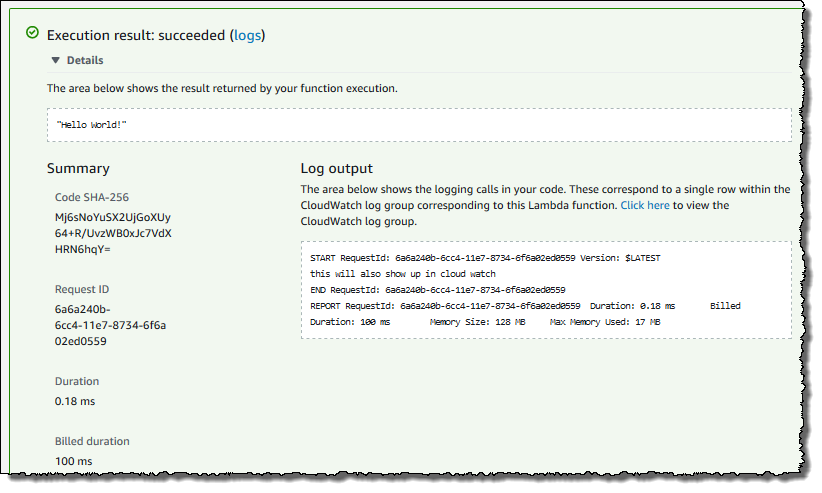

In [15]:
# example RequestResponse invocation type (synchronous execution)
Image("../../raw_data/images/lambda_logging.png", width=800, height=400)

##### review our python lambda script to automate downloading the annual reports

In [12]:
less lambda_exercise/lambda.py

##### Upload Lambda function to AWS

1. Create a directory for the lambda (this can have any name of your choosing)
2. Save the python file into the lambda dir (e.g. lambda.py)
3. Install necessary packages into lambda_exercise directory
    - pip install requests beautifulsoup4 -t lambda_exercise_1/
4. Package the file and any dependencies into a .zip file. When creating the zip, include only the code and its dependencies, not the containing folder.
5. Upload the .zip file using either the console or AWS CLI to create a Lambda function. You specify the function name in the Python code to be used as the handler when you create a Lambda function. 

### IAM Policies

Many AWS services require that you use roles to control what that service can access. A role that a service assumes to perform actions on your behalf is called a service role. When a role serves a specialized purpose for a service, it is categorized as a service role for EC2 instances (for example), or a service-linked role. To see what services support using service-linked roles, or whether a service supports any form of temporary credentials, see AWS Services That Work with IAM. To learn how an individual service uses roles, choose the service name in the table to view the documentation for that service.

SOURCE: https://docs.aws.amazon.com/IAM/latest/UserGuide/id_roles_create_for-service.html?icmpid=docs_iam_console

In [27]:
aws_iam_url = 'https://docs.aws.amazon.com/IAM/latest/UserGuide/id_roles_create_for-service.html?icmpid=docs_iam_console'
iframe = '<iframe src={} width=1100 height=300></iframe>'.format(aws_iam_url)
HTML(iframe)

##### Execution Role

The execution role defines which AWS resources your function is allowed to access.

##### Function Policy
The function policy defines which AWS resources are allowed to invoke your function.

In [28]:
# default lambda_basic_execution role
{
  "roleName": "lambda_basic_execution",
  "policies": [
    {
      "document": {
        "Version": "2012-10-17",
        "Statement": [
          {
            "Effect": "Allow",
            "Action": [
              "logs:CreateLogGroup",
              "logs:CreateLogStream",
              "logs:PutLogEvents"
            ],
            "Resource": "arn:aws:logs:*:*:*"
          }
        ]
      },
      "name": "oneClick_lambda_basic_execution_1506433762285",
      "type": "inline"
    },
    {
      "document": {
        "Version": "2012-10-17",
        "Statement": [
          {
            "Action": [
              "dynamodb:*",
              "dax:*",
              "application-autoscaling:DeleteScalingPolicy",
              "application-autoscaling:DeregisterScalableTarget",
              "application-autoscaling:DescribeScalableTargets",
              "application-autoscaling:DescribeScalingActivities",
              "application-autoscaling:DescribeScalingPolicies",
              "application-autoscaling:PutScalingPolicy",
              "application-autoscaling:RegisterScalableTarget",
              "cloudwatch:DeleteAlarms",
              "cloudwatch:DescribeAlarmHistory",
              "cloudwatch:DescribeAlarms",
              "cloudwatch:DescribeAlarmsForMetric",
              "cloudwatch:GetMetricStatistics",
              "cloudwatch:ListMetrics",
              "cloudwatch:PutMetricAlarm",
              "datapipeline:ActivatePipeline",
              "datapipeline:CreatePipeline",
              "datapipeline:DeletePipeline",
              "datapipeline:DescribeObjects",
              "datapipeline:DescribePipelines",
              "datapipeline:GetPipelineDefinition",
              "datapipeline:ListPipelines",
              "datapipeline:PutPipelineDefinition",
              "datapipeline:QueryObjects",
              "ec2:DescribeVpcs",
              "ec2:DescribeSubnets",
              "ec2:DescribeSecurityGroups",
              "iam:GetRole",
              "iam:ListRoles",
              "sns:CreateTopic",
              "sns:DeleteTopic",
              "sns:ListSubscriptions",
              "sns:ListSubscriptionsByTopic",
              "sns:ListTopics",
              "sns:Subscribe",
              "sns:Unsubscribe",
              "sns:SetTopicAttributes",
              "lambda:CreateFunction",
              "lambda:ListFunctions",
              "lambda:ListEventSourceMappings",
              "lambda:CreateEventSourceMapping",
              "lambda:DeleteEventSourceMapping",
              "lambda:GetFunctionConfiguration",
              "lambda:DeleteFunction"
            ],
            "Effect": "Allow",
            "Resource": "*"
          },
          {
            "Action": [
              "iam:PassRole"
            ],
            "Effect": "Allow",
            "Resource": "*",
            "Condition": {
              "StringLike": {
                "iam:PassedToService": [
                  "application-autoscaling.amazonaws.com",
                  "dax.amazonaws.com"
                ]
              }
            }
          },
          {
            "Effect": "Allow",
            "Action": [
              "iam:CreateServiceLinkedRole"
            ],
            "Resource": "*",
            "Condition": {
              "StringEquals": {
                "iam:AWSServiceName": [
                  "replication.dynamodb.amazonaws.com",
                  "dax.amazonaws.com",
                  "dynamodb.application-autoscaling.amazonaws.com"
                ]
              }
            }
          }
        ]
      },
      "name": "AmazonDynamoDBFullAccess",
      "id": "ANPAINUGF2JSOSUY76KYA",
      "type": "managed",
      "arn": "arn:aws:iam::aws:policy/AmazonDynamoDBFullAccess"
    },
    {
      "document": {
        "Version": "2012-10-17",
        "Statement": [
          {
            "Effect": "Allow",
            "Action": [
              "iot:*"
            ],
            "Resource": "*"
          }
        ]
      },
      "name": "AWSIoTFullAccess",
      "id": "ANPAJU2FPGG6PQWN72V2G",
      "type": "managed",
      "arn": "arn:aws:iam::aws:policy/AWSIoTFullAccess"
    }
  ]
}

{'policies': [{'document': {'Statement': [{'Action': ['logs:CreateLogGroup',
       'logs:CreateLogStream',
       'logs:PutLogEvents'],
      'Effect': 'Allow',
      'Resource': 'arn:aws:logs:*:*:*'}],
    'Version': '2012-10-17'},
   'name': 'oneClick_lambda_basic_execution_1506433762285',
   'type': 'inline'},
  {'arn': 'arn:aws:iam::aws:policy/AmazonDynamoDBFullAccess',
   'document': {'Statement': [{'Action': ['dynamodb:*',
       'dax:*',
       'application-autoscaling:DeleteScalingPolicy',
       'application-autoscaling:DeregisterScalableTarget',
       'application-autoscaling:DescribeScalableTargets',
       'application-autoscaling:DescribeScalingActivities',
       'application-autoscaling:DescribeScalingPolicies',
       'application-autoscaling:PutScalingPolicy',
       'application-autoscaling:RegisterScalableTarget',
       'cloudwatch:DeleteAlarms',
       'cloudwatch:DescribeAlarmHistory',
       'cloudwatch:DescribeAlarms',
       'cloudwatch:DescribeAlarmsForMetri

### CloudWatch

Amazon CloudWatch is a monitoring service for AWS cloud resources and the applications you run on AWS. You can use Amazon CloudWatch to collect and track metrics, collect and monitor log files, set alarms, and automatically react to changes in your AWS resources. Amazon CloudWatch can monitor AWS resources such as Amazon EC2 instances, Amazon DynamoDB tables, and Amazon RDS DB instances, as well as custom metrics generated by your applications and services, and any log files your applications generate. You can use Amazon CloudWatch to gain system-wide visibility into resource utilization, application performance, and operational health. You can use these insights to react and keep your application running smoothly.

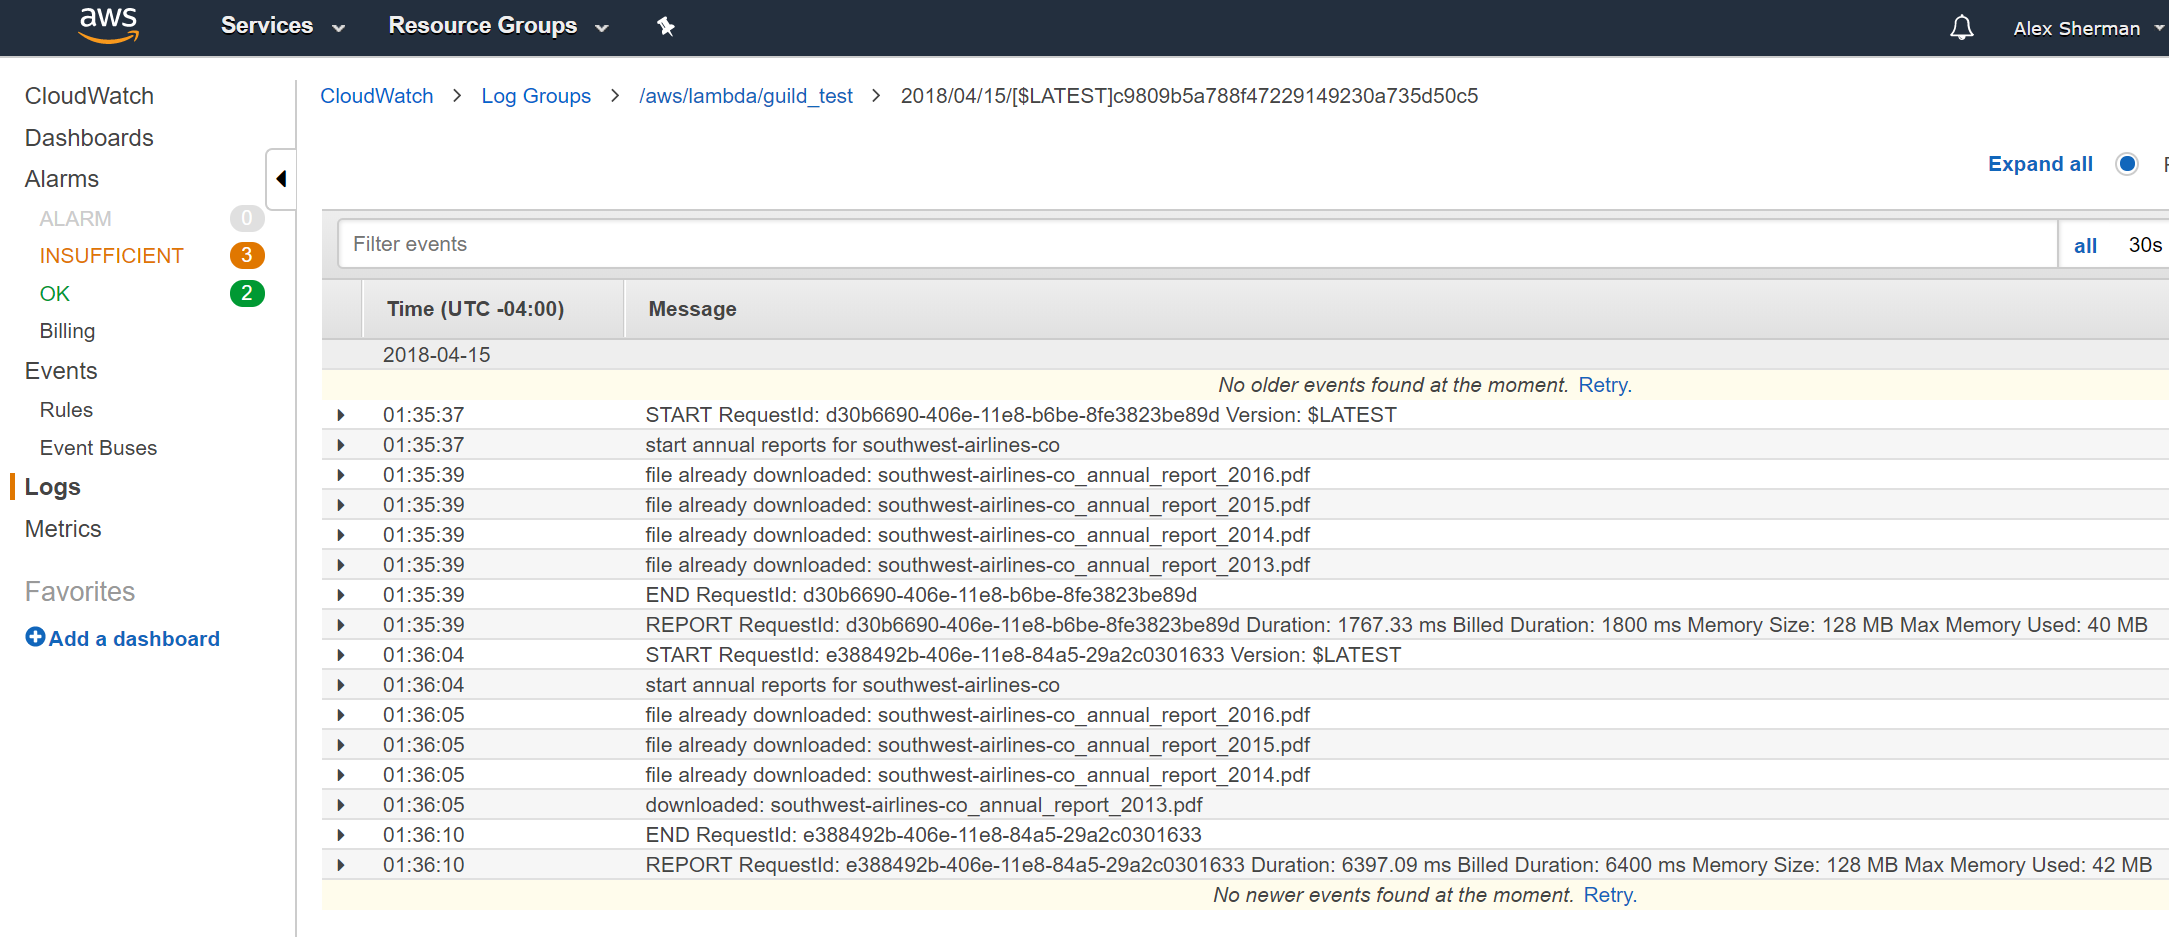

In [30]:
# example CloudWatch logs
Image("../../raw_data/images/aws_cloudwatch.png", width=800, height=400)

##### CloudWatch Events

You can also use CloudWatch Events to schedule automated actions that self-trigger at certain times using cron or rate expressions. For more information, see Schedule Expressions for Rules.

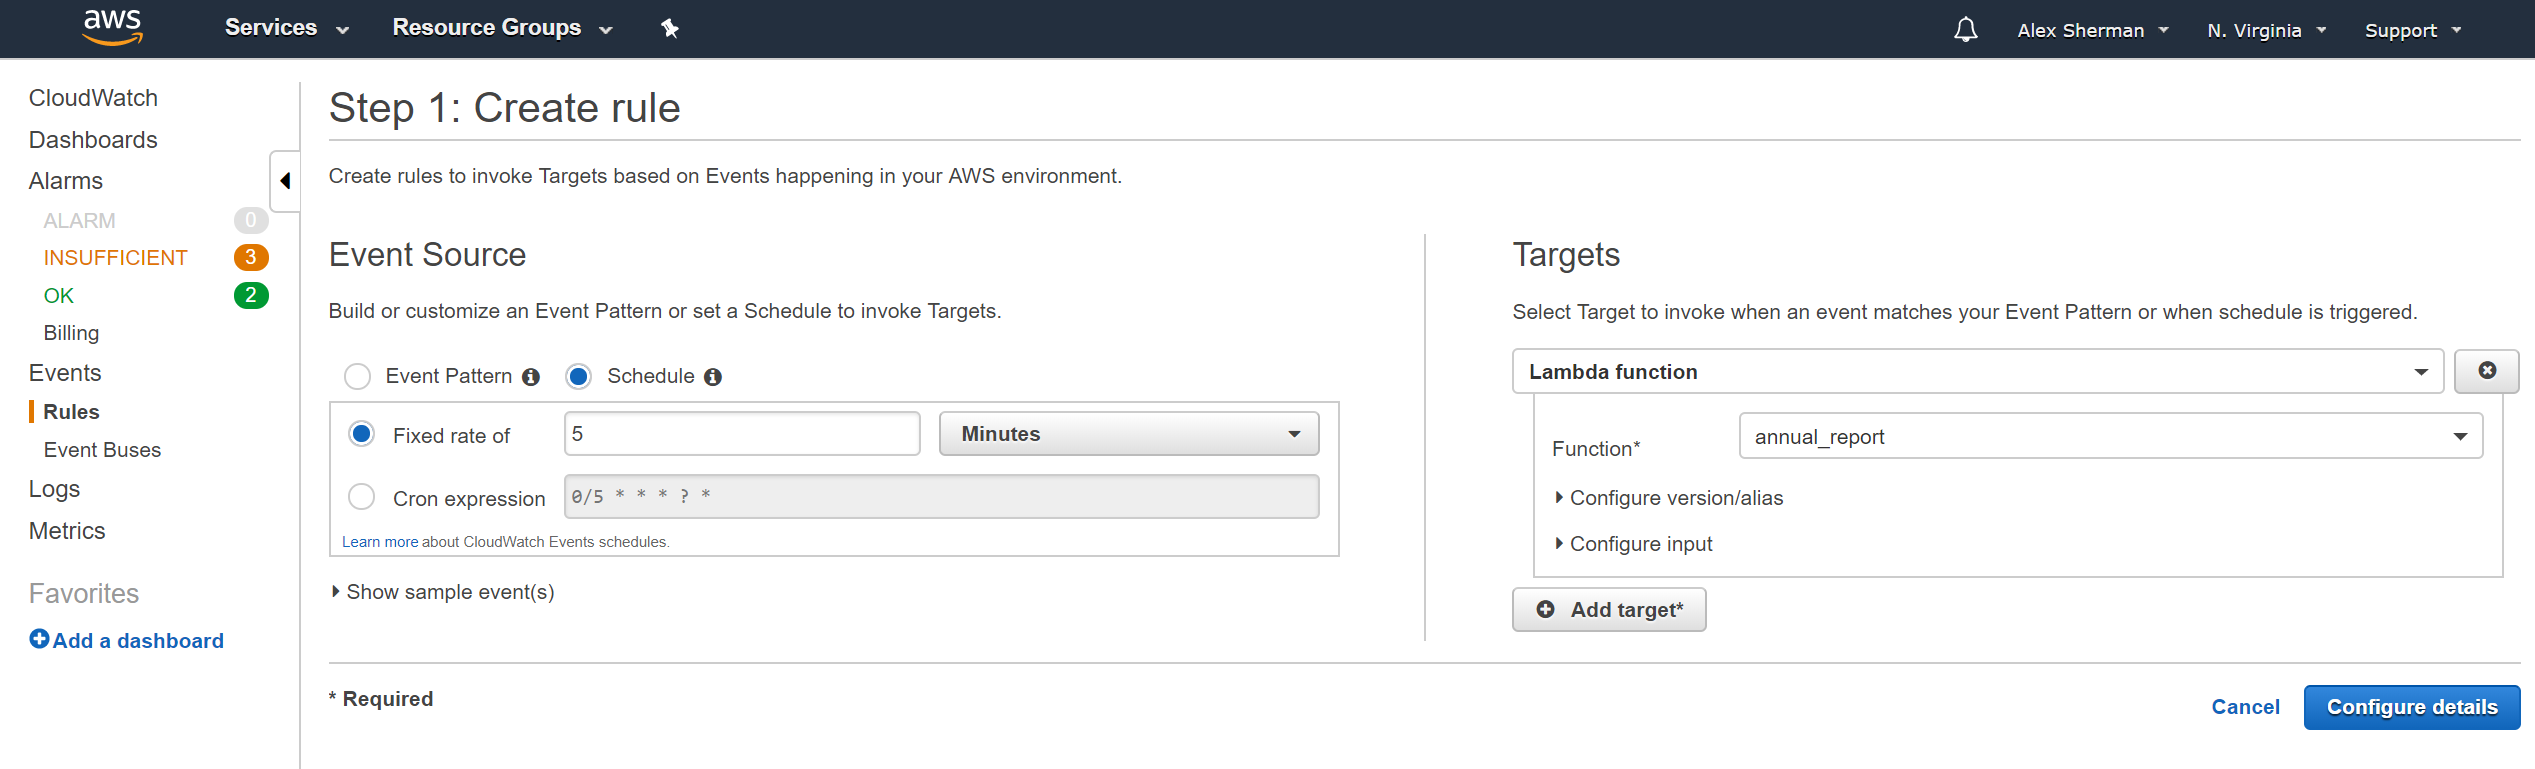

In [35]:
# example CloudWatch logs
Image("../../raw_data/images/aws_cloudwatch_event.png", width=800, height=400)

### Dynamodb

Amazon DynamoDB is a fast and flexible NoSQL database service for all applications that need consistent, single-digit millisecond latency at any scale. It is a fully managed cloud database and supports both document and key-value store models. Its flexible data model, reliable performance, and automatic scaling of throughput capacity make it a great fit for mobile, web, gaming, ad tech, IoT, and many other applications.

In [49]:
# DynamoDB boto3 documentations
aws_dynamodb_url = 'http://boto3.readthedocs.io/en/latest/guide/dynamodb.html'
iframe = '<iframe src={} width=900 height=300></iframe>'.format(aws_dynamodb_url)
HTML(iframe)

In [36]:
import boto3

# Get the service resource
dynamodb = boto3.resource('dynamodb')

# Create the DynamoDB table
table = dynamodb.create_table(
    TableName='annual_report',
    KeySchema=[
        {
            'AttributeName': 'document_name',
            'KeyType': 'HASH'
        }
    ],
    AttributeDefinitions=[
        {
            'AttributeName': 'document_name',
            'AttributeType': 'S'
        },

    ],
    ProvisionedThroughput={
        'ReadCapacityUnits': 5,
        'WriteCapacityUnits': 5
    }
)

# Wait until the table exists
table.meta.client.get_waiter('table_exists').wait(TableName='annual_report')

# Print out some data about the table
print(table.item_count)

0


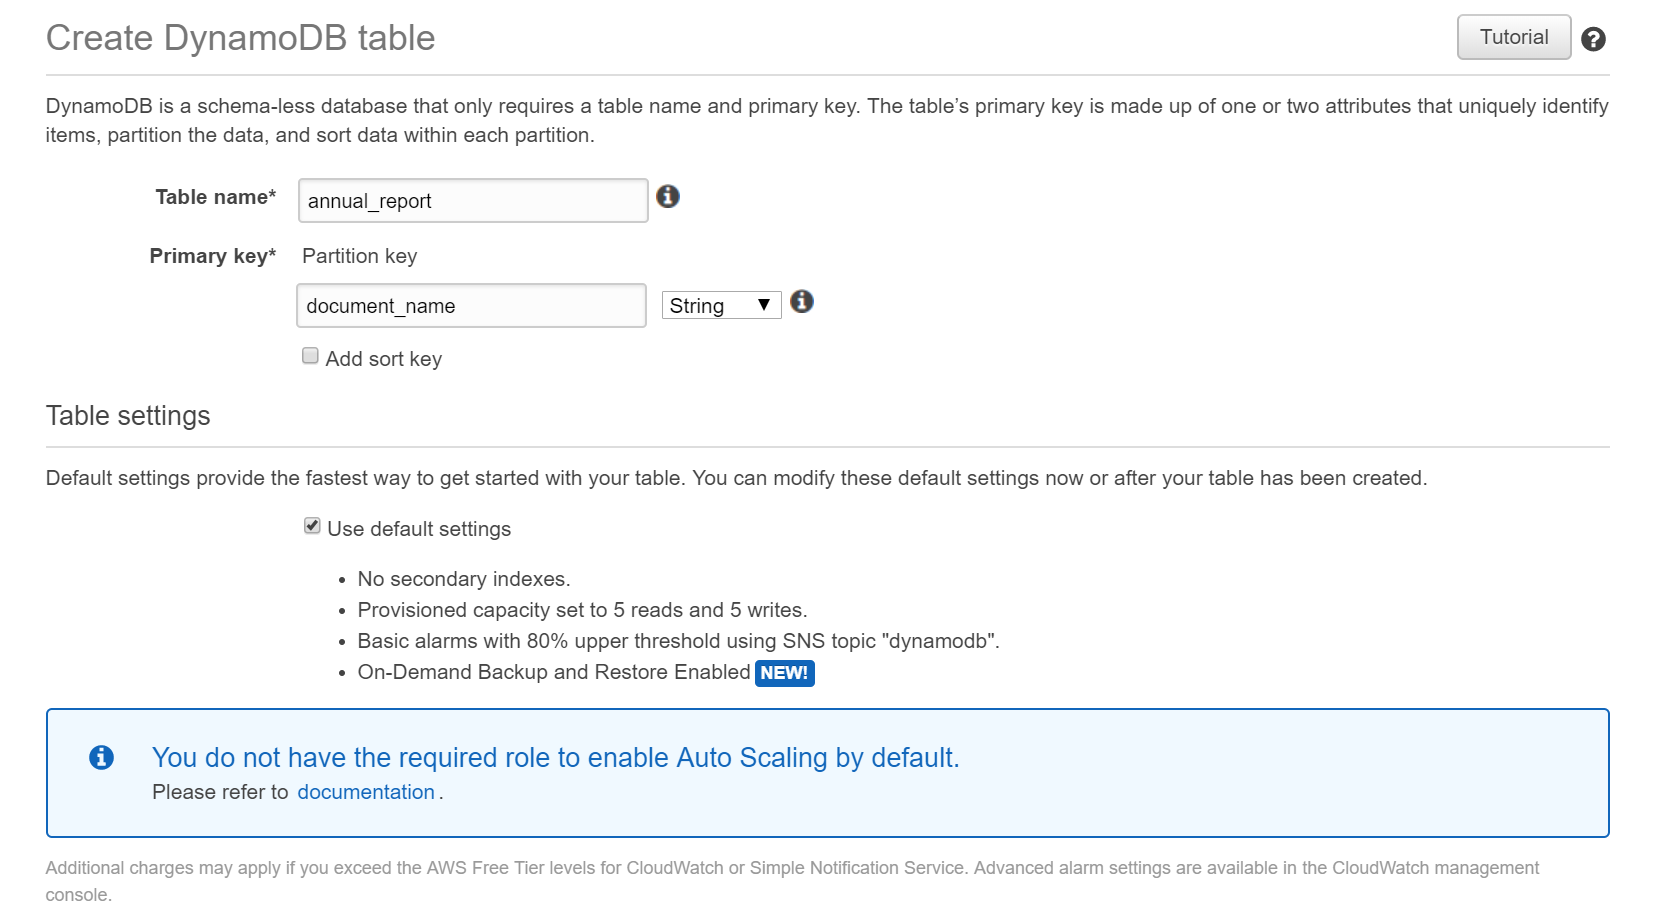

In [47]:
# DynamoDB UI to create a table
Image("../../raw_data/images/dynamodb.png", width=800, height=400)

In [48]:
# DynamoDB create table documentation
aws_dynamodb_create_url = 'https://docs.aws.amazon.com/amazondynamodb/latest/APIReference/API_CreateTable.html'
iframe = '<iframe src={} width=900 height=300></iframe>'.format(aws_dynamodb_create_url)
HTML(iframe)

In [43]:
import boto3

# Get the service resource
dynamodb = boto3.resource('dynamodb')

# Instantiate an existing DynamoDB table
table = dynamodb.Table('annual_report')

# insert a record into the table
table.put_item(
   Item={
        'document_name': 'Southwest_Airlines_2018',
        'document_text': 'example text from Southwest Airlines annual report',
    }
)

{'ResponseMetadata': {'HTTPHeaders': {'connection': 'keep-alive',
   'content-length': '2',
   'content-type': 'application/x-amz-json-1.0',
   'date': 'Sun, 15 Apr 2018 20:55:18 GMT',
   'server': 'Server',
   'x-amz-crc32': '2745614147',
   'x-amzn-requestid': 'TB8QRQAN8RTOAOK1F2IGDHRU7NVV4KQNSO5AEMVJF66Q9ASUAAJG'},
  'HTTPStatusCode': 200,
  'RequestId': 'TB8QRQAN8RTOAOK1F2IGDHRU7NVV4KQNSO5AEMVJF66Q9ASUAAJG',
  'RetryAttempts': 0}}

In [44]:
response = table.get_item(
    Key={
        'document_name': 'Southwest_Airlines_2018'
    }
)
item = response['Item']
print(item)

{'document_name': 'Southwest_Airlines_2018', 'document_text': 'example text from Southwest Airlines annual report'}


In [46]:
# uncomment below to delete a DynamoDB table
#table.delete()

### Lambda Triggers - Notify Lambda via events on S3

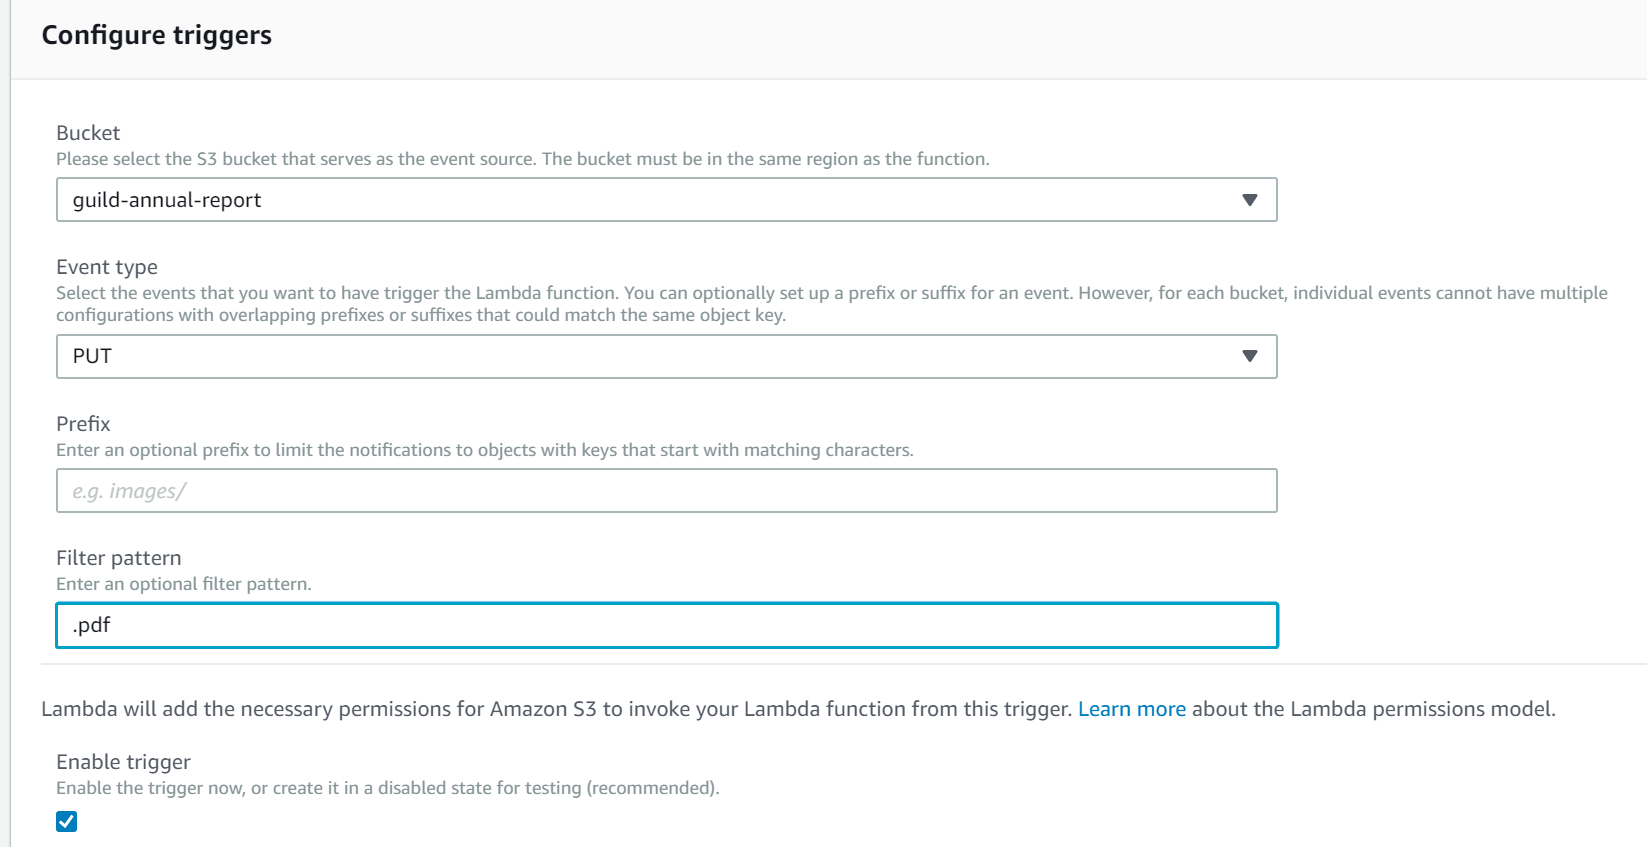

In [50]:
# Lambda S3 trigger
Image("../../raw_data/images/lambda_trigger.png", width=800, height=400)

In [53]:
event = {'Records': [{'eventVersion': '2.0', 'eventSource': 'aws:s3', 'awsRegion': 'us-east-1', 'eventTime': '2018-04-15T22:52:46.971Z', 'eventName': 'ObjectCreated:Put', 'userIdentity': {'principalId': 'AWS:AROAJOW7QYIJB25YKY4FK:guild_test'}, 'requestParameters': {'sourceIPAddress': '35.171.28.151'}, 'responseElements': {'x-amz-request-id': '25EE84AB695137FF', 'x-amz-id-2': 'rA8xg9DpR1LgmHvF+1nq+MgQUU7sPDH9VzXWntU3TPV39PDMhjT+CjP84clrm/d2VTptiw4WtZU='}, 's3': {'s3SchemaVersion': '1.0', 'configurationId': 'bdb2d4ef-0e04-4861-8524-0d3d97c0008b', 'bucket': {'name': 'guild-annual-report', 'ownerIdentity': {'principalId': 'A2IHE3SC8NO8AN'}, 'arn': 'arn:aws:s3:::guild-annual-report'}, 'object': {'key': 'southwest-airlines-co_annual_report_2013.pdf', 'size': 482959, 'eTag': '802c810c7ef52e4735b7bdec6c8fc100', 'sequencer': '005AD3D7BEDC9AF6B4'}}}]}
event

{'Records': [{'awsRegion': 'us-east-1',
   'eventName': 'ObjectCreated:Put',
   'eventSource': 'aws:s3',
   'eventTime': '2018-04-15T22:52:46.971Z',
   'eventVersion': '2.0',
   'requestParameters': {'sourceIPAddress': '35.171.28.151'},
   'responseElements': {'x-amz-id-2': 'rA8xg9DpR1LgmHvF+1nq+MgQUU7sPDH9VzXWntU3TPV39PDMhjT+CjP84clrm/d2VTptiw4WtZU=',
    'x-amz-request-id': '25EE84AB695137FF'},
   's3': {'bucket': {'arn': 'arn:aws:s3:::guild-annual-report',
     'name': 'guild-annual-report',
     'ownerIdentity': {'principalId': 'A2IHE3SC8NO8AN'}},
    'configurationId': 'bdb2d4ef-0e04-4861-8524-0d3d97c0008b',
    'object': {'eTag': '802c810c7ef52e4735b7bdec6c8fc100',
     'key': 'southwest-airlines-co_annual_report_2013.pdf',
     'sequencer': '005AD3D7BEDC9AF6B4',
     'size': 482959},
    's3SchemaVersion': '1.0'},
   'userIdentity': {'principalId': 'AWS:AROAJOW7QYIJB25YKY4FK:guild_test'}}]}

In [60]:
document_name = event['Records'][0]['s3']['object']['key']
document_name

'southwest-airlines-co_annual_report_2013.pdf'

##### Lambda extract_document instructions:
- pip install PyPDF2 -t lambda_solution_2/